# Week 3

## Exercise 1

The formula for the Pearson correlation (for a population, not a sample):

$$
\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \cdot \sigma_Y}
$$

If you have a lot of noise in your data, the formula doesn't work quite as well. When you visualize the data, then you can see if there is some kind of correlation, while a few outliers may be skewing the correlation somehow. 


A bar chart and a histogram look very similar, in that both have bars. However, a bar chart compares categories, so that you can for example look at how many of something you might have, or how many of something in a category there are. Usually, the x-axis contains the categories, and the y-axis has the numeric values for the category. Each bar represents a category, and there are usually gaps between each bar. 
A histogram usually measures frequency. Each bar in a histogram represents a bin, between two values. Here there aren't any gaps between the bars. On the y-axis, there are frequencies, so that you see how often each bin is filled. On the x-axis are the numeric values, which are the same from the y-axis on bar charts. 
Histograms can be used when you have many different categories, which can clutter up a normal bar chart. You can choose each bin so that the frequency of a category having a numerical value within the bin is represented. 

One way to decide the size and amount of bins is using a formula. One of these formulas called Sturges Law:

$$
bins = 1 + \lceil log(n) \rceil
$$

Ceiling the logarithm makes sure the amount ends up as an integer. n is the size of the sample, so the formula is based on the size of the dataset. This makes it a fairly simple formula, easy to understand and use. 

## Exercise 2

1. A jitter plot is one-dimensional plot, where each data point is plot along the x-axis, but to avoid points stacking on top of each other, they are "jittered" so that they have different placements on the y-axis. The y-axis has no meaning in this setting, the x-axis has the important information.

2. Figure 2.3 shows two representations of histograms. The first one has each bin with the edges aligned on integers, while the second has the bins centered on each integer. This is to show how misleading the histograms can be, depending on how you center your histograms and choose your bins. 

3. It seems that KDEs tend to minimize large spikes in data. So a very tall histogram bin, tends to get shorter in a KDE. Also, they mislead, since the area of the curve is much smaller under large spikes, than beneath a longer, but "shorter" tail. Where the area under the curve is larger is where there is a larger probability of the value to be observed. 

4. A histogram or KDE tends to be fairly intuitive on first glance. A peak in a histogram or KDE means that more observations were made there. The same isn't clear in a CDF. A peak in a KDE or histogram doesn't appear in the same place in a CDF for the same dataset. However, that can work in the CDF's favor, since we can make quantitative statements about the data, which we can't get from histograms or KDEs.

5. A quantile plot is basically a CDF plot, with the x and y axes swapped. They are good for asking specific questions about the percentiles in the data. The quantile plot makes it easier to read the answer to such questions.

6. Plot the dataset according to the inverse function $\Phi^{-1}(y_i) = \frac{x_i - \mu}{\sigma} $, only defined for 0 < x < 1. It should show whether or not the dataset follows a Gaussian distribution, where it does follow it if the line is straight. The good thing is that you can directly read the mean (the intercept on the y-axis) and standard deviation (the slope) on the plot. It is also sometimes called a PP plot. The example here is for a Gaussian distribution. But you can actually use any distribution, just find the inverse of the function and plot according to that.

7. Since summary statistics are based around an assumption that the data is unimodal, that is, based around a single central peak, they are misleading when that assumption isn't fulfilled. Plotting or visualizing the full data therefore is extremely important to try and avoid any bias or assumptions you might have made about the data. 

8. Box plots are most useful for comparing distributions, so that one can see how alike several datasets are (or aren't). Since outliers are explicit and the symmetric nature of datapoints can be seen (or not seen), it is usually best for scenarios where you want to compare and deduce that. 

9. Violin plots are like box plots, including all the same data, but their shape is decided by a two-sided KDE plot. This often ends in a shape that looks like a violin. In my opinion, these are harder to look at and understand quickly, but definitely provide a more detailed view of the data than a box plot.

10. In the video, the box plots don't change at all, even after the algorithm in the video has been applied. In a violin plot, the KDE which makes up the shape of the violin, should change with the applied algorithm. 

## Exercise 3

### Jitter Plot

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

data_crime = data[data["Category"] == "ROBBERY"]

data_crime["Date"] = pd.to_datetime(data_crime["Date"])
data_crime["Time"] = pd.to_datetime(data_crime["Time"])


C:\Users\maxhb\AppData\Local\Temp\ipykernel_15704\3022549946.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
C:\Users\maxhb\AppData\Local\Temp\ipykernel_15704\3022549946.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_crime["Date"] = pd.to_datetime(data_crime["Date"])
C:\Users\maxhb\AppData\Local\Temp\ipykernel_15704\3022549946.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_crime["Time"] = pd.to_datetime(data_crime["Time"])
C:\Users\

In [86]:
start_date = "2015-01-01"
end_date = "2015-03-30"

data_time = data_crime[(data_crime["Date"] >= start_date) & (data_crime["Date"] <= end_date)]
data_time = data_crime[(data_crime["Time"].dt.hour == 13)].sort_values(by="Time")


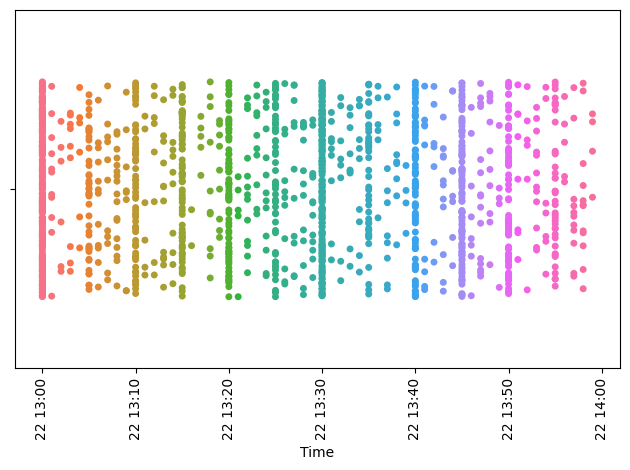

In [82]:
import seaborn as sns

sns.stripplot(data_time,x="Time", hue="Time" ,jitter=0.3, legend=False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Histograms

In [43]:
start_date = "2014-01-01"
end_date = "2017-12-30"

data["Date"] = pd.to_datetime(data["Date"])
data["Time"] = pd.to_datetime(data["Time"])
data_drunkenness = data[data["Category"] == "DRUNKENNESS"]
data_prostitution = data[data["Category"] == "PROSTITUTION"]
data_drunkenness = data_drunkenness[(data_drunkenness["Date"] >= start_date) & (data_drunkenness["Date"] <= end_date)]
data_prostitution = data_prostitution[(data_prostitution["Date"] >= start_date) & (data_prostitution["Date"] <= end_date)]
print(len(data_drunkenness))
print(len(data_prostitution))

3225
1652
1542


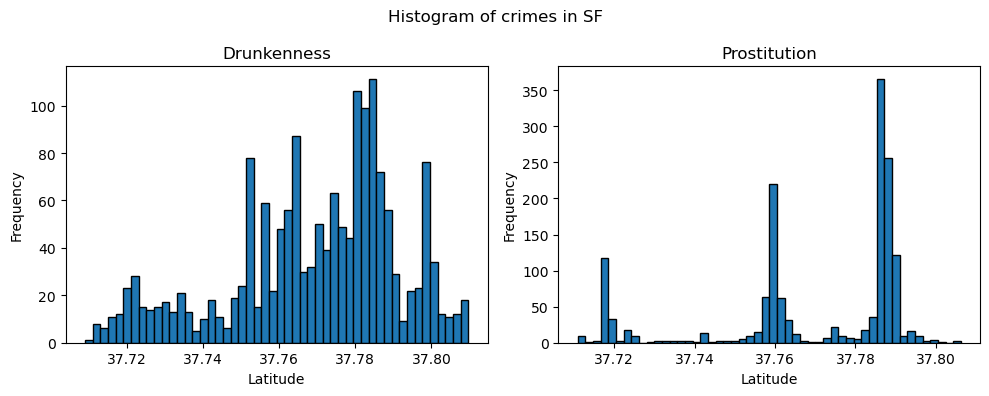

In [67]:
nrows = 1
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(10, 4))
axes = axes.flatten()

fig.suptitle("Histogram of crimes in SF")

axes[0].hist(data_drunkenness["Y"], bins=50, edgecolor='black')
axes[0].set_title("Drunkenness")
axes[0].set_xlabel("Latitude")
axes[0].set_ylabel("Frequency")


axes[1].hist(data_prostitution["Y"], bins=50,edgecolor='black')
axes[1].set_title("Prostitution")
axes[1].set_xlabel("Latitude")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



### KDE

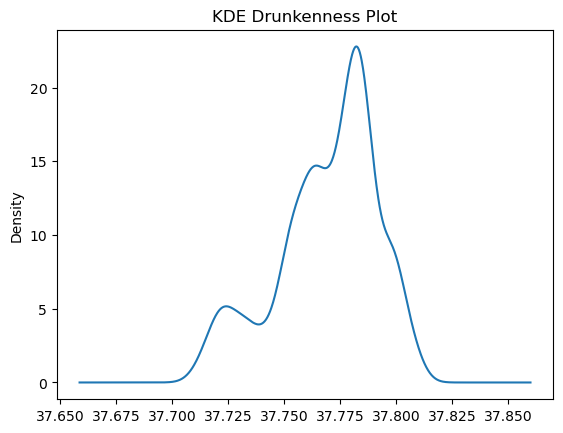

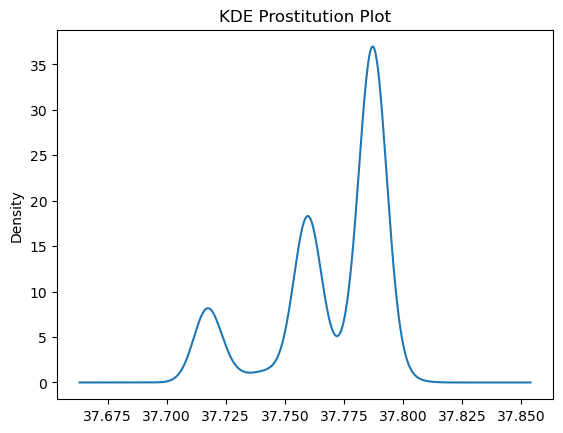

In [97]:
data_drunkenness["Y"].plot.kde()
plt.title("KDE Drunkenness Plot")
plt.show()

data_prostitution["Y"].plot.kde()
plt.title("KDE Prostitution Plot")
plt.show()


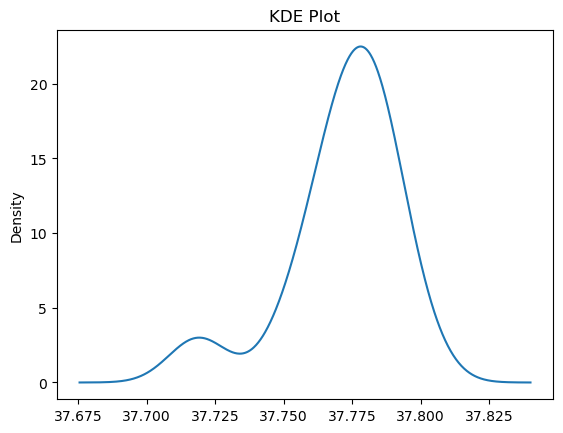

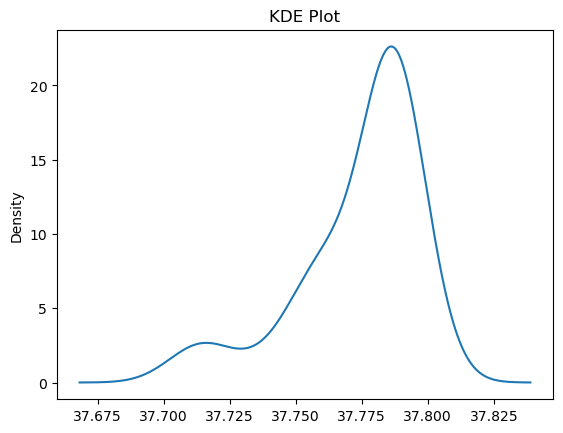

In [99]:
data_crime_sample = data_drunkenness.sample(n=25)

data_crime_sample["Y"].plot.kde()
plt.title("KDE Plot")
plt.show()

data_crime_sample = data_prostitution.sample(n=25)

data_crime_sample["Y"].plot.kde()
plt.title("KDE Plot")
plt.show()

### Probability plot

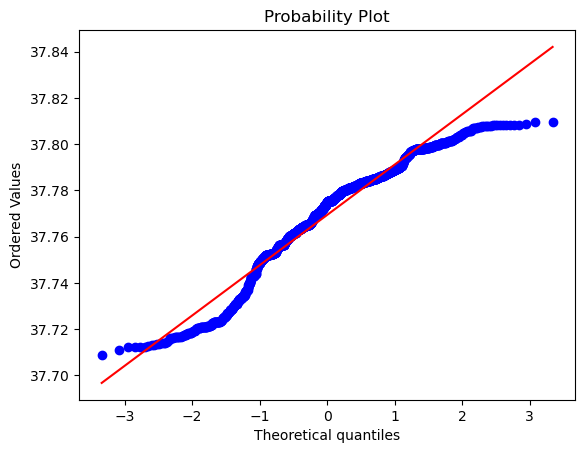

((array([-3.33960204, -3.08486071, -2.94334522, ...,  2.94334522,
        3.08486071,  3.33960204]), array([37.70905906, 37.71116187, 37.71215029, ..., 37.80859051,
       37.8096707 , 37.8096707 ])), (0.02174982852549363, 37.76941977762355, 0.9761616031737967))


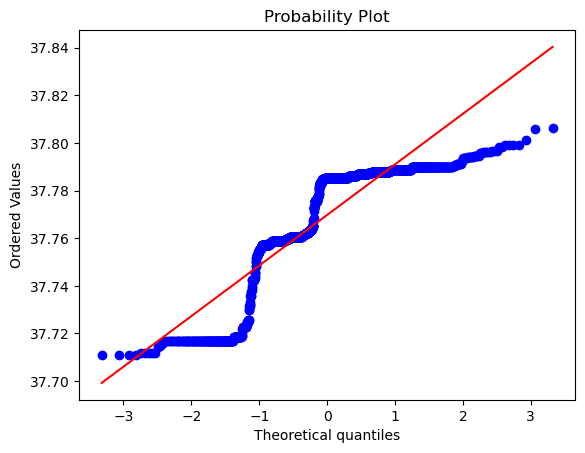

((array([-3.32041988, -3.06431173, -2.92195442, ...,  2.92195442,
        3.06431173,  3.32041988]), array([37.71085552, 37.71085552, 37.71100233, ..., 37.80130415,
       37.80602553, 37.80622143])), (0.021241267799041202, 37.769754726074716, 0.8907970600952719))


In [107]:
import scipy
from scipy import stats

axe1 = plt.subplot()
res1 = scipy.stats.probplot(data_drunkenness["Y"],plot=plt, dist=stats.norm)
plt.show()
print(res1)

axe2 = plt.subplot()
res2 = scipy.stats.probplot(data_prostitution["Y"],plot=plt, dist=stats.norm)
plt.show()
print(res2)

Since neither of the plots follow a straight line, they don't follow a normal distribution. We can see their intercepts and slopes are very close to each other, numerically. 

### Box plot crimes per day

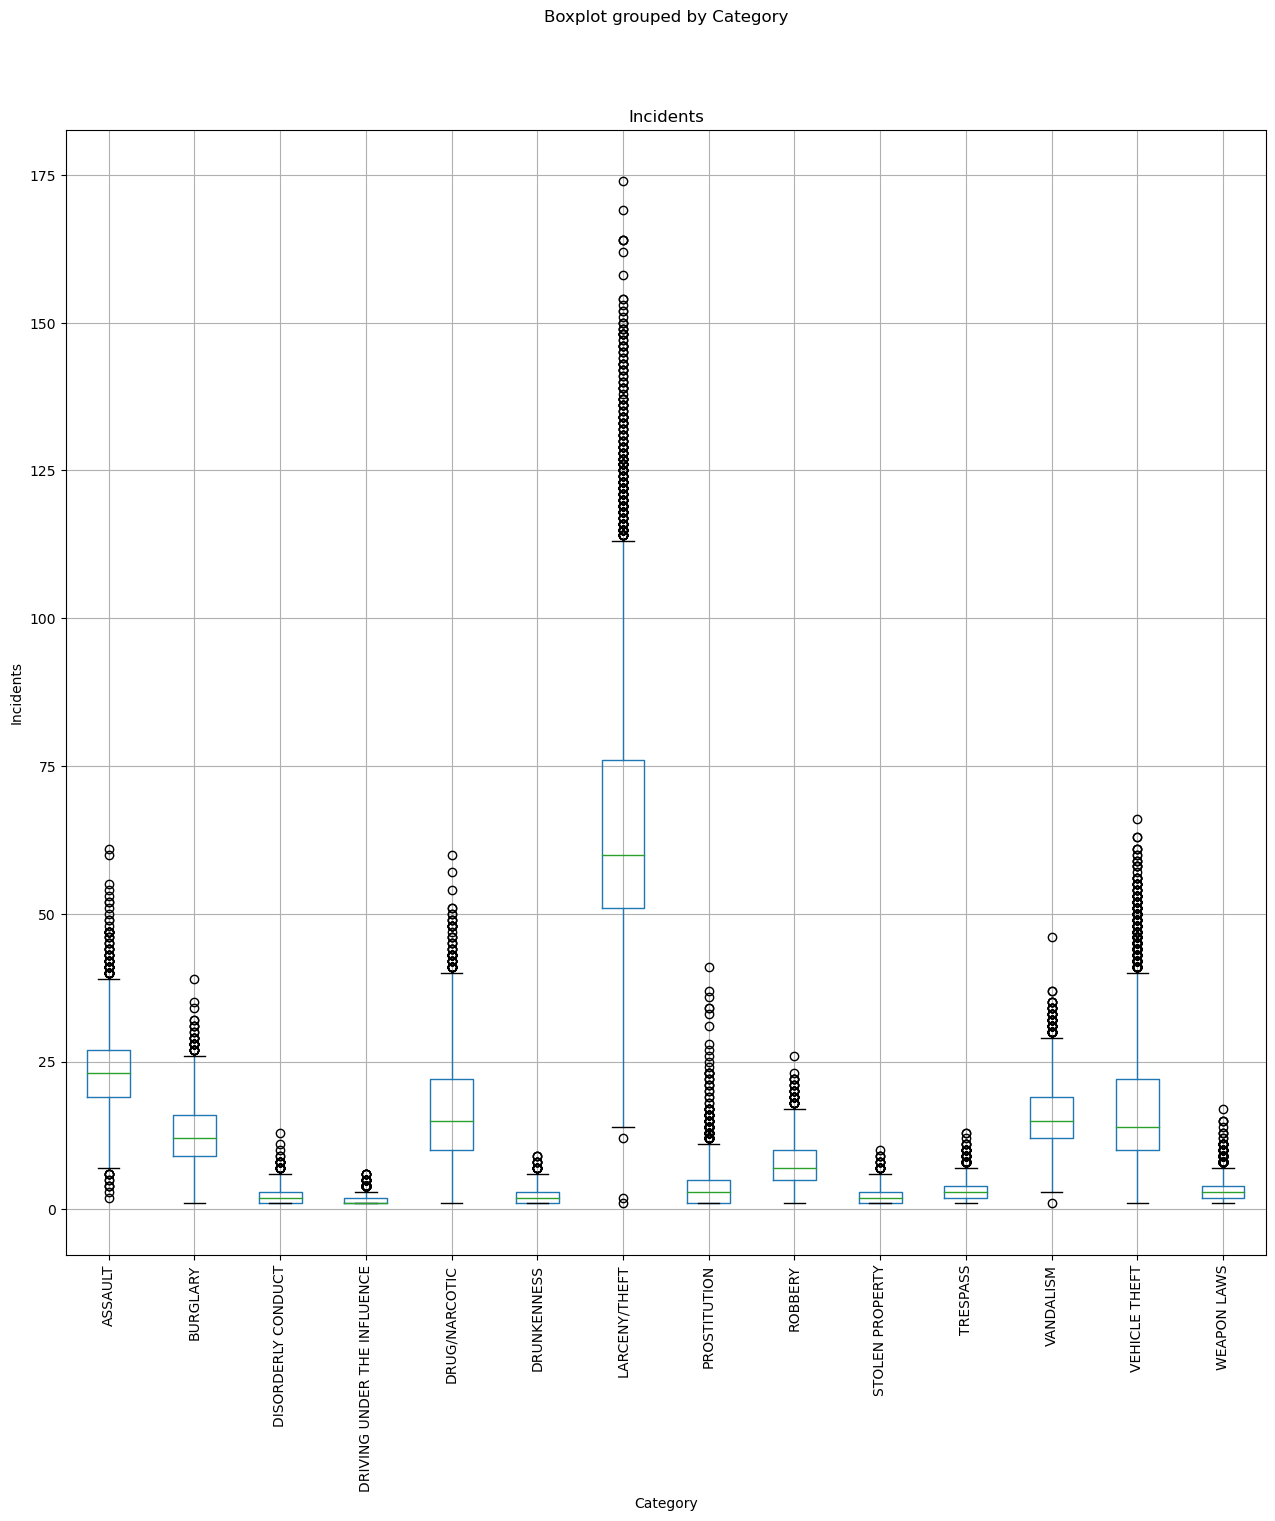

In [144]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = data[data["Category"].isin(focuscrimes)]

crimes_per_day = data.groupby(['Category', 'Date']).size().reset_index(name = 'Incidents')
#print(crimes_per_day)

crimes_per_day.boxplot(by='Category', column='Incidents', figsize=(15,15))
plt.ylabel("Incidents")
plt.xticks(rotation=90)
plt.show()


A lot of theft happens every day. The mean for it is shifted very high, compared to all the others. Also, many of the datasets seem to have a lot of outliers, meaning in the span of 15 years, a lot of days seem to have a lot more crime than others. Also, comparably, driving under the influence has very few crimes, and seemingly just doesn't happen very often. 

### Box plot - average time-per-day

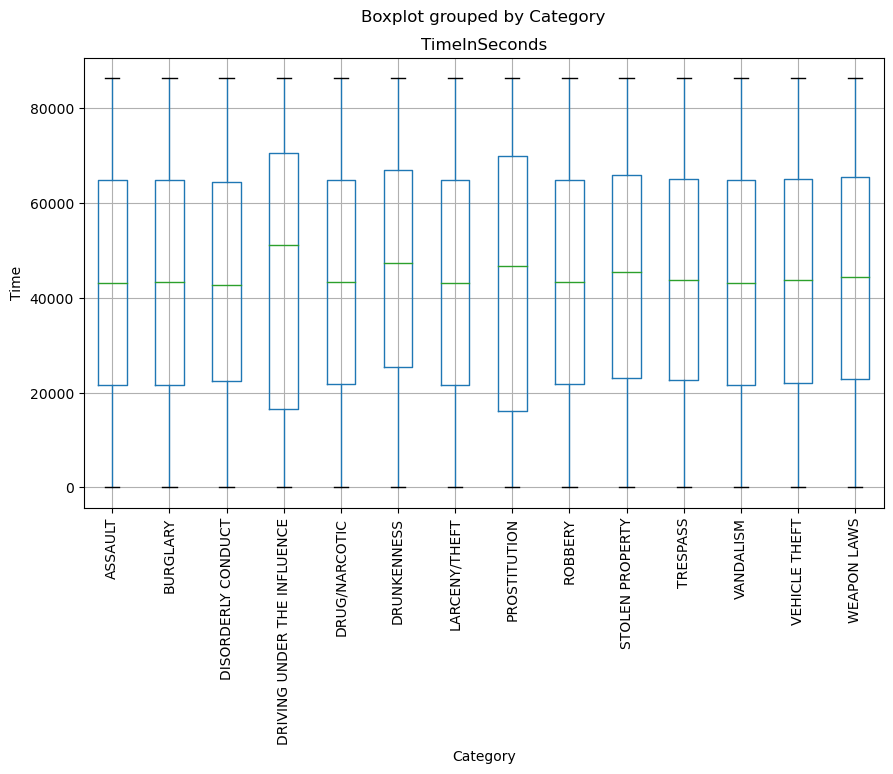

In [160]:
data["Time"] = pd.to_datetime(data["Time"])
hours_in_seconds = (data["Time"].dt.hour*60)*60
minutes_in_seconds = data["Time"].dt.minute*60
time_in_seconds = hours_in_seconds + minutes_in_seconds
data["TimeInSeconds"] = time_in_seconds
time_per_day = data.groupby(['Category', 'TimeInSeconds']).size().reset_index(name = 'Incidents')
time_per_day.boxplot(by='Category', column='TimeInSeconds', figsize=(10,6))
#plt.yscale('log')
plt.ylabel("Time")
plt.xticks(rotation=90)
plt.show()


                       Category  TimeInSeconds
0                       ASSAULT   47297.112865
1                      BURGLARY   47172.163581
2            DISORDERLY CONDUCT   39554.994221
3   DRIVING UNDER THE INFLUENCE   41965.319485
4                 DRUG/NARCOTIC   52082.329668
5                   DRUNKENNESS   47625.830316
6                 LARCENY/THEFT   52982.495293
7                  PROSTITUTION   49380.227748
8                       ROBBERY   48290.572231
9               STOLEN PROPERTY   48329.786903
10                     TRESPASS   44627.793708
11                    VANDALISM   50085.270503
12                VEHICLE THEFT   53852.690770
13                  WEAPON LAWS   50049.972583


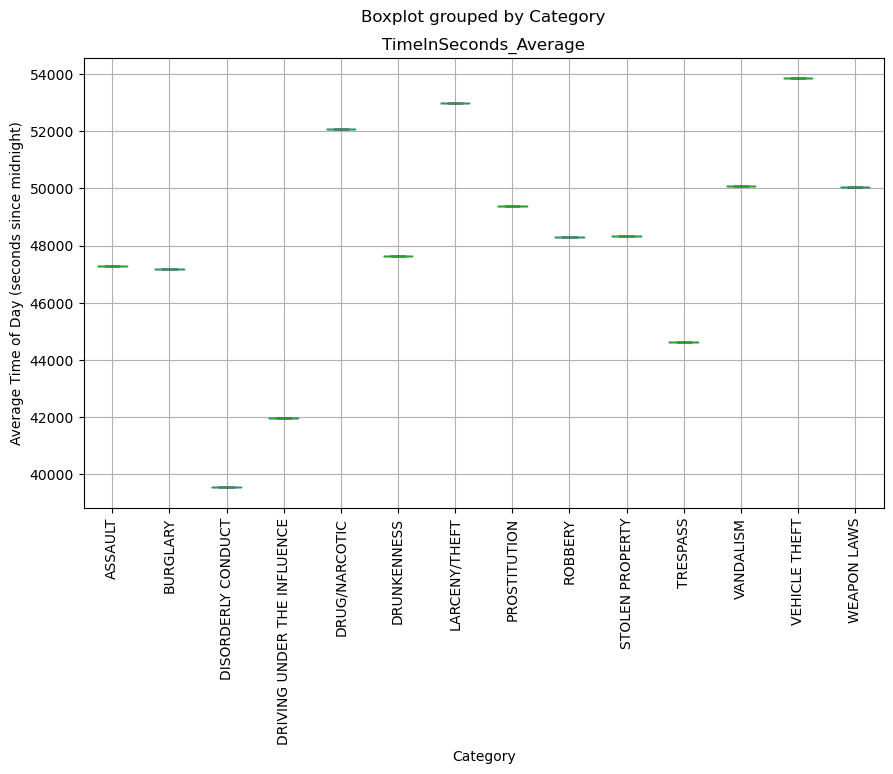

In [158]:

# Convert 'Time' to datetime and then to seconds since midnight
data["Time"] = pd.to_datetime(data["Time"])
hours_in_seconds = (data["Time"].dt.hour * 60) * 60
minutes_in_seconds = data["Time"].dt.minute * 60
data["TimeInSeconds"] = hours_in_seconds + minutes_in_seconds

# Calculate average time of day (in seconds) for each crime category
average_time_per_category = data.groupby('Category')['TimeInSeconds'].mean().reset_index()
print(average_time_per_category)

# Merge this average time back into the original dataframe to plot it
data_merged = pd.merge(data, average_time_per_category, on='Category', suffixes=('', '_Average'))

# Now, plot the average time in seconds since midnight for each category
data_merged.boxplot(by='Category', column='TimeInSeconds_Average', figsize=(10,6))
plt.ylabel("Average Time of Day (seconds since midnight)")
plt.xticks(rotation=90)
plt.show()


## Exercise 4 - Plotly

### Map for random data

In [42]:
import pandas as pd
randomdata = {
    'CENTRAL': 0.283805288999638,
    'SOUTHERN': 0.8882636532075772,
    'BAYVIEW': 0.45059924801053985,
    'MISSION': 0.6000904430914474,
    'PARK': 0.6362552416309091,
    'RICHMOND': 0.3371857964893169,
    'INGLESIDE': 0.09876749056377487,
    'TARAVAL': 0.009436215026031758,
    'NORTHERN': 0.44884916837512767,
    'TENDERLOIN': 0.06616710190569974
}
print(randomdata)
data_tuples = list(randomdata.items())

randomData = pd.DataFrame(data_tuples, columns=['District', 'Values'])
print(da)

{'CENTRAL': 0.283805288999638, 'SOUTHERN': 0.8882636532075772, 'BAYVIEW': 0.45059924801053985, 'MISSION': 0.6000904430914474, 'PARK': 0.6362552416309091, 'RICHMOND': 0.3371857964893169, 'INGLESIDE': 0.09876749056377487, 'TARAVAL': 0.009436215026031758, 'NORTHERN': 0.44884916837512767, 'TENDERLOIN': 0.06616710190569974}
     District    Values
0     CENTRAL  0.283805
1    SOUTHERN  0.888264
2     BAYVIEW  0.450599
3     MISSION  0.600090
4        PARK  0.636255
5    RICHMOND  0.337186
6   INGLESIDE  0.098767
7     TARAVAL  0.009436
8    NORTHERN  0.448849
9  TENDERLOIN  0.066167


In [43]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    districts = json.load(response)
    


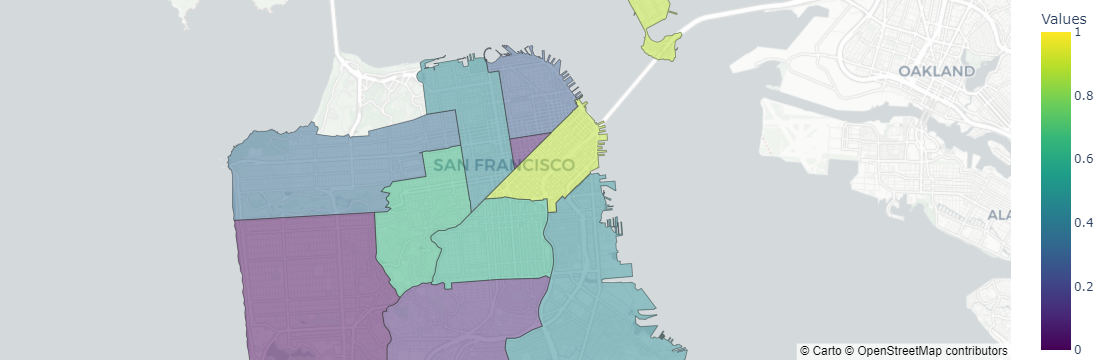

In [53]:
import plotly.express as px

fig = px.choropleth_mapbox(randomData, geojson=districts, locations='District', color='Values',
                           color_continuous_scale="Viridis",
                           range_color=(0, 1),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5,
                           labels={'Values':'Values'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Map for crime data

In [60]:
from pandas.api.types import CategoricalDtype


data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
data_vehicle = data[data["Category"] == "VEHICLE THEFT"]
data_vehicle = data[data["DayOfWeek"] == "Sunday"]



C:\Users\maxhb\AppData\Local\Temp\ipykernel_45180\484444508.py:4: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [66]:
district_counts = data_vehicle["PdDistrict"].value_counts()
data_tuples = list(district_counts.items())
district_counts = pd.DataFrame(data_tuples, columns=['District', 'Values'])
print(district_counts)

     District  Values
0    SOUTHERN   40076
1     MISSION   30186
2    NORTHERN   28313
3     CENTRAL   24532
4     BAYVIEW   21315
5  TENDERLOIN   18550
6   INGLESIDE   18453
7     TARAVAL   15533
8        PARK   12564
9    RICHMOND   11899


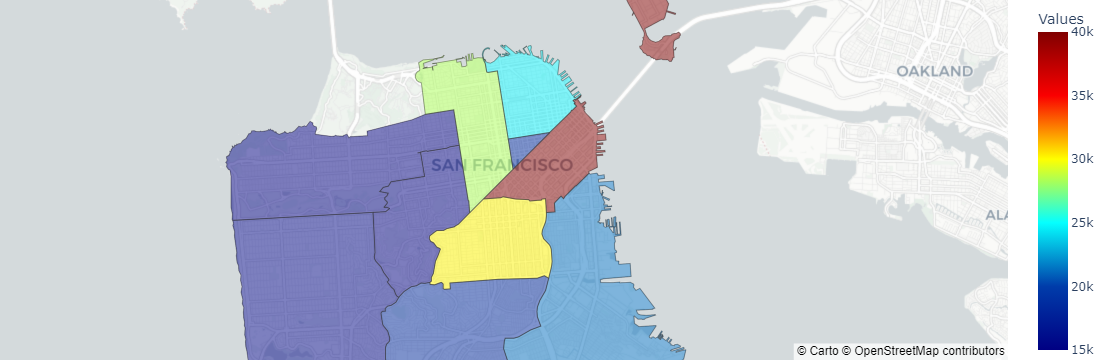

In [71]:
import plotly.express as px

fig = px.choropleth_mapbox(district_counts, geojson=districts, locations='District', color='Values',
                           color_continuous_scale="jet",
                           range_color=(15000, 40000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5,
                           labels={'Values':'Values'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Worst place to park is in Southern.
Best place is Richmond

By changing the color ranges, we can make the differences between the districts much less (or much more) evident. A large range shows perhaps more accurately the differences between them. A small range will show much less differences, as well as choosing a different color gradient. 

Perceptual errors often happen when someone quickly glances at a graph, and the person making the graph or plot might want these perceptual errors to happen, so that a certain conclusion will be made by whoever is glancing at the plot. This makes them especially dangerous.  